<a href="https://colab.research.google.com/github/Branth1/Project4/blob/master/Project4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fix for OBSPY

In [0]:
!pip install --upgrade seaborn==0.9.0
!pip install obspy

Note, time windows for analyzed data was determined from a previous notebook

## Imports

In [1]:
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime
!pip install thredds_crawler
from thredds_crawler.crawl import Crawl
import pandas as pd
from pandas import DataFrame
from datetime import timedelta
from datetime import datetime
import os
import glob
import re
import time
from scipy.fftpack import fft
%matplotlib inline

## Oregon Shelf Surface Mooring

Determining Data Sets

In [0]:
#Data windows have been determined from Project2c. The data being analyzed falls in the middle of a time window previously determined.
#To improve accuracy of events, only 5 minute recordings will be used
shelf_nowind_norain = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/05/01/OO-HYEA2--YDH-2019-05-01T15:10:00.000000.mseed'
shelf_wind_norain = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/07/OO-HYEA2--YDH-2019-02-07T22:00:00.000000.mseed'
shelf_rain_nowind = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/02/03/OO-HYEA2--YDH-2019-02-03T14:20:00.000000.mseed'
shelf_wind_rain = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/05/25/OO-HYEA2--YDH-2019-05-25T03:20:00.000015.mseed'


In [0]:
st = read(shelf_nowind_norain)
st2 = read(shelf_wind_norain)
st3 = read(shelf_rain_nowind)
st4 = read(shelf_wind_rain)

In [0]:
#since all data sets have the same sampling rate we will only do this once
fs = st[0].stats.sampling_rate
#frequency is also the same for all
fre = np.linspace(1,fs,64000)

### Calculate PSD

FFT

In [0]:
#Shelf no Wind no Rain
x = (st[0].data)*np.hanning(len(st[0].data))
xfftnew = []
#Calculating FFT in 1 second increments over the 5 minute period
for i in range(0,len(st[0].data),64001):
  p = x[i:i+64001]
  xfft = 2*np.square(fft(p,64000))/(len(p)*fs)
  xfftnew.append(xfft)

#Shelf Wind no Rain
x2 = (st2[0].data)*np.hanning(len(st2[0].data))
xfftnew2 = []
for i in range(0,len(st2[0].data),64001):
  p2 = x2[i:i+64001]
  xfft2 = 2*np.square(fft(p2,64000))/(len(p2)*fs)
  xfftnew2.append(xfft2)

#Shelf Rain no Wind
x3 = (st3[0].data)*np.hanning(len(st3[0].data))
xfftnew3 = []
for i in range(0,len(st3[0].data),64001):
  p3 = x3[i:i+64001]
  xfft3 = 2*np.square(fft(p3,64000))/(len(p3)*fs)
  xfftnew3.append(xfft3)

#Shelf Wind and Rain
x4 = (st4[0].data)*np.hanning(len(st4[0].data))
xfftnew4 = []
for i in range(0,len(st4[0].data),64001):
  p4 = x4[i:i+64001]
  xfft4 = 2*np.square(fft(p4,64000))/(len(p4)*fs)
  xfftnew4.append(xfft4)

Find Average of FFT

In [0]:
avg_fft = sum(xfftnew)/len(xfftnew)
avg_fft2 = sum(xfftnew2)/len(xfftnew2)
avg_fft3 = sum(xfftnew3)/len(xfftnew3)
avg_fft4 = sum(xfftnew4)/len(xfftnew4)

Convert to dB

In [0]:

data_db = 10*np.log10(np.abs(avg_fft))+169-128.9
data_db2 = 10*np.log10(np.abs(avg_fft2))+169-128.9
data_db3 = 10*np.log10(np.abs(avg_fft3))+169-128.9
data_db4 = 10*np.log10(np.abs(avg_fft4))+169-128.9


###Plot PSD(dB) Vs. Freq

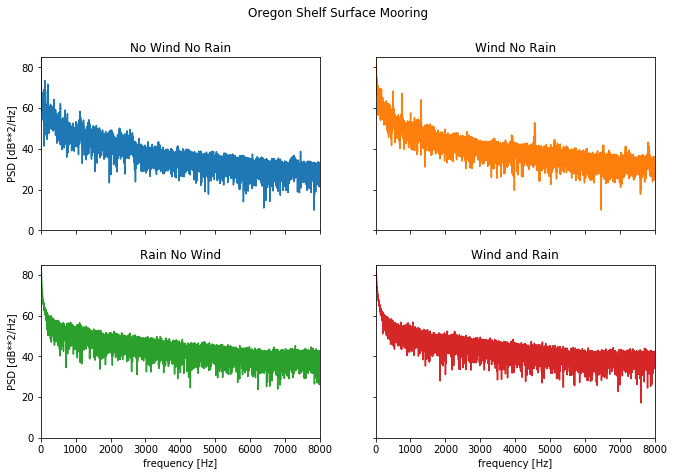

In [8]:
fig, axs = plt.subplots(2, 2,sharex=True,sharey=True)
fig.suptitle('Oregon Shelf Surface Mooring')
fig.set_size_inches(11,7)

axs[0, 0].plot(fre[0:32000], data_db[0:32000])
axs[0, 0].set_title('No Wind No Rain')
axs[0, 0].set_xlim([0, 8000])
axs[0, 0].set_ylim([0,85])

axs[0, 1].plot(fre[0:32000], data_db2[0:32000], 'tab:orange')
axs[0, 1].set_title('Wind No Rain')
axs[0, 1].set_xlim([0, 8000])
axs[0, 1].set_ylim([0,85])

axs[1, 0].plot(fre[0:32000], data_db3[0:32000], 'tab:green')
axs[1, 0].set_title('Rain No Wind')
axs[1, 0].set_xlim([0, 8000])
axs[1, 0].set_ylim([0, 85])

axs[1, 1].plot(fre[0:32000], data_db4[0:32000], 'tab:red')
axs[1, 1].set_title('Wind and Rain')
axs[1, 1].set_xlim([0, 8000])
axs[1, 1].set_ylim([0, 85])

for ax in axs.flat:
    ax.set(xlabel='frequency [Hz]', ylabel='PSD [dB**2/Hz]')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


## Oregon Offshore Surface Mooring

Determining Data Sets

In [0]:
offshore_nowind_norain = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/04/OO-HYEA1--YDH-2019-02-04T20:35:00.000000.mseed'
offshore_wind_norain = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/20/OO-HYEA1--YDH-2019-02-20T21:05:00.000000.mseed'
offshore_rain_nowind = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/29/OO-HYEA1--YDH-2019-01-29T20:10:00.000015.mseed'
offshore_wind_rain = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/02/23/OO-HYEA1--YDH-2019-02-23T10:00:00.008563.mseed'


In [0]:
st5 = read(offshore_nowind_norain)
st6 = read(offshore_wind_norain)
st7 = read(offshore_rain_nowind)
st8 = read(offshore_wind_rain)
  #from above
#fs = st[0].stats.sampling_rate
#fre = np.linspace(1,fs,64000)

###Calculate PSD

FFT

In [0]:
#Offshore no Wind no Rain
x5 = (st5[0].data)*np.hanning(len(st5[0].data))
xfftnew5 = []
#Calculating FFT in 1 second increments over the 5 minute period
for i in range(0,len(st5[0].data),64001):
  p5 = x5[i:i+64001]
  xfft5 = 2*np.square(fft(p5,64000))/(len(p5)*fs)
  xfftnew5.append(xfft5)

#Offshore Wind no Rain
x6 = (st6[0].data)*np.hanning(len(st6[0].data))
xfftnew6 = []
for i in range(0,len(st6[0].data),64001):
  p6 = x6[i:i+64001]
  xfft6 = 2*np.square(fft(p6,64000))/(len(p6)*fs)
  xfftnew6.append(xfft6)

#Offshore Rain no Wind
x7 = (st7[0].data)*np.hanning(len(st7[0].data))
xfftnew7 = []
for i in range(0,len(st7[0].data),64001):
  p7 = x7[i:i+64001]
  xfft7 = 2*np.square(fft(p7,64000))/(len(p7)*fs)
  xfftnew7.append(xfft7)

#Offshore Wind and Rain
x8 = (st8[0].data)*np.hanning(len(st8[0].data))
xfftnew8 = []
for i in range(0,len(st8[0].data),64001):
  p8 = x8[i:i+64001]
  xfft8 = 2*np.square(fft(p8,64000))/(len(p8)*fs)
  xfftnew8.append(xfft8)

Find Average FFT

In [0]:
avg_fft5 = sum(xfftnew5)/len(xfftnew5)
avg_fft6 = sum(xfftnew6)/len(xfftnew6)
avg_fft7 = sum(xfftnew7)/len(xfftnew7)
avg_fft8 = sum(xfftnew8)/len(xfftnew8)

Convert to dB

In [0]:
data_db5 = 10*np.log10(np.abs(avg_fft5))+169-128.9
data_db6 = 10*np.log10(np.abs(avg_fft6))+169-128.9
data_db7 = 10*np.log10(np.abs(avg_fft7))+169-128.9
data_db8 = 10*np.log10(np.abs(avg_fft8))+169-128.9


###Plot PSD(dB) Vs. Freq

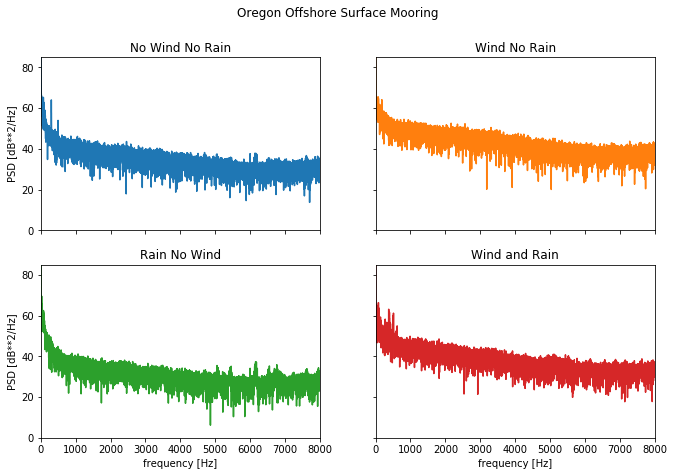

In [14]:
fig, axs2 = plt.subplots(2, 2,sharex=True,sharey=True)
fig.suptitle('Oregon Offshore Surface Mooring')
fig.set_size_inches(11,7)

axs2[0, 0].plot(fre[0:32000], data_db5[0:32000])
axs2[0, 0].set_title('No Wind No Rain')
axs2[0, 0].set_xlim([0, 8000])
axs2[0, 0].set_ylim([0, 85])

axs2[0, 1].plot(fre[0:32000], data_db6[0:32000], 'tab:orange')
axs2[0, 1].set_title('Wind No Rain')
axs2[0, 1].set_xlim([0, 8000])
axs2[0, 1].set_ylim([0, 85])

axs2[1, 0].plot(fre[0:32000], data_db7[0:32000], 'tab:green')
axs2[1, 0].set_title('Rain No Wind')
axs2[1, 0].set_xlim([0, 8000])
axs2[1, 0].set_ylim([0, 85])

axs2[1, 1].plot(fre[0:32000], data_db8[0:32000], 'tab:red')
axs2[1, 1].set_title('Wind and Rain')
axs2[1, 1].set_xlim([0, 8000])
axs2[1, 1].set_ylim([0, 85])

for ax in axs2.flat:
    ax.set(xlabel='frequency [Hz]', ylabel='PSD [dB**2/Hz]')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs2.flat:
    ax.label_outer()

## Airgun

In [0]:
airgun_data = 'https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T04:15:00.000016.mseed'


In [0]:
sta = read(airgun_data)

5333


(0, 200)

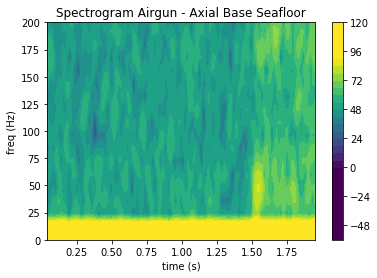

In [17]:
fs = sta[0].stats.sampling_rate
t_start = sta[0].stats.starttime+8
t_end = sta[0].stats.starttime +10
sliced2 = sta.slice(t_start, t_end)

npts = len(sliced2[0])
end = npts / fs
nfft = int(fs/12)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced2[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=90)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('Spectrogram Airgun - Axial Base Seafloor')
plt.colorbar()
plt.ylim(0,200)

# Marine Mammals

In [0]:
marine_data = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T19:15:00.000000.mseed'

In [0]:
stm = read(marine_data)

8000


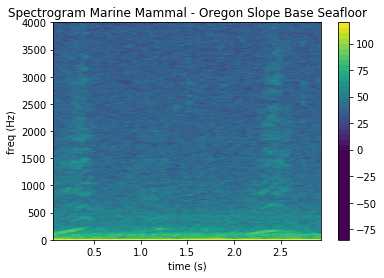

In [20]:
fs = stm[0].stats.sampling_rate
t_start = stm[0].stats.starttime 
t_end = stm[0].stats.starttime +3
sliced = stm.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/8)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,40,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('Spectrogram Marine Mammal - Oregon Slope Base Seafloor')
plt.colorbar()
plt.ylim(0,4000)
plt.rcParams["figure.figsize"] = [7,9]

# Volcano/Earthquake

According to USGS on 4/10/19 off of the Oregon Coast there was an earthquake around 14:11:31, Magnitude: 4.7

In [0]:
#using the time identified above, the data is selected from the Oregon Slope Base Seafloor
earthquake_data = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2019/04/10/OO-HYVM1--YDH-2019-04-10T14:10:00.000015.mseed'

In [0]:
stv = read(earthquake_data)

1032


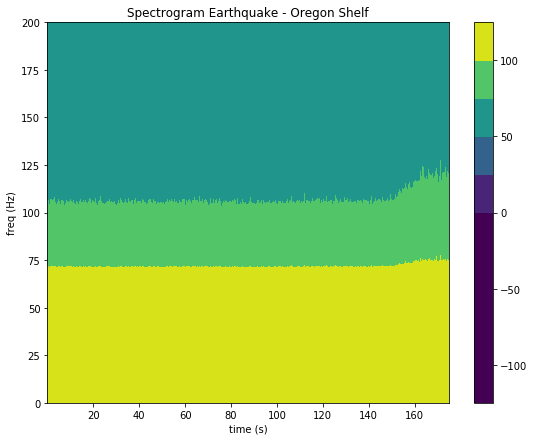

In [13]:
fs = stv[0].stats.sampling_rate
t_start = stv[0].stats.starttime+120
t_end = stv[0].stats.starttime +295
sliced3 = stv.slice(t_start, t_end)

npts = len(sliced3[0])
end = npts / fs
nfft = int(fs/62)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced3[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,10,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.title('Spectrogram Earthquake - Oregon Shelf')
plt.colorbar()
plt.ylim(0,200)
plt.rcParams["figure.figsize"] = [9,7]